# Forbes 2022 billionaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2022_forbes_billionaires.csv')
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [13]:
df['networth'] = df['networth'].apply(lambda x:x.replace('$', '')).apply(lambda x:x.replace(' B', '')).astype(float)
df = df.rename(columns={'networth':'networth(B$)'})
df.drop('Unnamed: 0', axis=1, inplace=True)

,Unnamed: 0,rank,name,networth(B$),age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [19]:
df.isnull().sum()

rank            0
name            0
networth(B$)    0
age             0
country         0
source          0
industry        0
dtype: int64

## 1. Who are the Top 10 richest in the world?

In [21]:
top10 = df.sort_values(by='networth(B$)', ascending=False)
top10.head()

,rank,name,networth(B$),age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


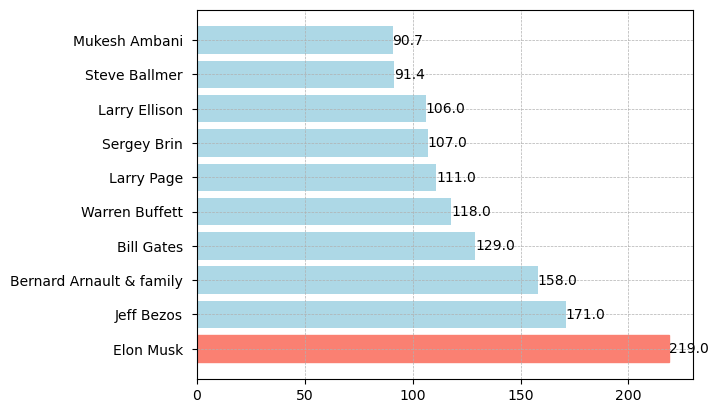

In [28]:
fig, ax = plt.subplots()

bars = ax.barh(top10['name'][:10], top10['networth(B$)'][:10], color='lightblue')
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')

bars[0].set_color('salmon')

ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()

## 2. Which country has the most billionares?

In [40]:
country = df['couhttp://localhost:8888/notebooks/Desktop/Practices/Forbes%202022%20billionaires.ipynb#2.-Which-country-has-the-most-billionares?ntry'].value_counts().to_frame().rename(columns={'country':'n_billionares'}).sort_values(by='n_billionares', ascending=False)
country.head()

,n_billionares
United States,719
China,515
India,161
Germany,130
Russia,81


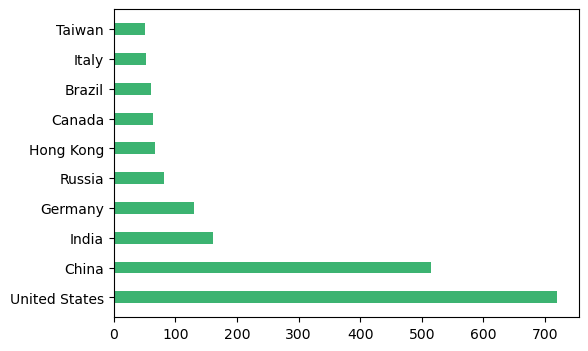

In [104]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(country.index[:10], country['n_billionares'][:10], height=0.4, color='mediumseagreen')
plt.show()

## 3. Who is the richest in Asia?

In [54]:
asia_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei",
    "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq",
    "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon",
    "Malaysia", "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman",
    "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", "Saudi Arabia", "Singapore",
    "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste",
    "Turkey", "Turkmenistan", "United Arab Emirates (UAE)", "Uzbekistan", "Vietnam", "Yemen"]


In [59]:
asia=[]
for c in df['country']:
    if c in asia_countries and c not in asia:
        asia.append(c)

asia

['India',
 'China',
 'Japan',
 'Indonesia',
 'Russia',
 'Singapore',
 'Israel',
 'Thailand',
 'Cyprus',
 'Malaysia',
 'Taiwan',
 'South Korea',
 'Philippines',
 'Vietnam',
 'Kazakhstan',
 'Georgia',
 'Turkey',
 'Lebanon',
 'Oman',
 'Qatar',
 'Nepal']

In [65]:
asia_df = df.set_index(keys='country')
asia_df = asia_df.loc[
['India',
 'China',
 'Japan',
 'Indonesia',
 'Russia',
 'Singapore',
 'Israel',
 'Thailand',
 'Cyprus',
 'Malaysia',
 'Taiwan',
 'South Korea',
 'Philippines',
 'Vietnam',
 'Kazakhstan',
 'Georgia',
 'Turkey',
 'Lebanon',
 'Oman',
 'Qatar',
 'Nepal']]

asia_df.head()

,rank,name,networth(B$),age,source,industry
country,,,,,,
India,10,Mukesh Ambani,90.7,64,diversified,Diversified
India,11,Gautam Adani & family,90.0,59,"infrastructure, commodities",Diversified
India,47,Shiv Nadar,28.7,76,software services,Technology
India,56,Cyrus Poonawalla,24.3,80,vaccines,Healthcare
India,81,Radhakishan Damani,20.0,67,"retail, investments",Fashion & Retail


In [67]:
asia_df = asia_df.sort_values(by='networth(B$)', ascending=False)
asia_df.head()

,rank,name,networth(B$),age,source,industry
country,,,,,,
India,10,Mukesh Ambani,90.7,64,diversified,Diversified
India,11,Gautam Adani & family,90.0,59,"infrastructure, commodities",Diversified
China,17,Zhong Shanshan,65.7,67,"beverages, pharmaceuticals",Food & Beverage
China,25,Zhang Yiming,50.0,38,TikTok,Media & Entertainment
China,34,Ma Huateng,37.2,50,internet media,Technology


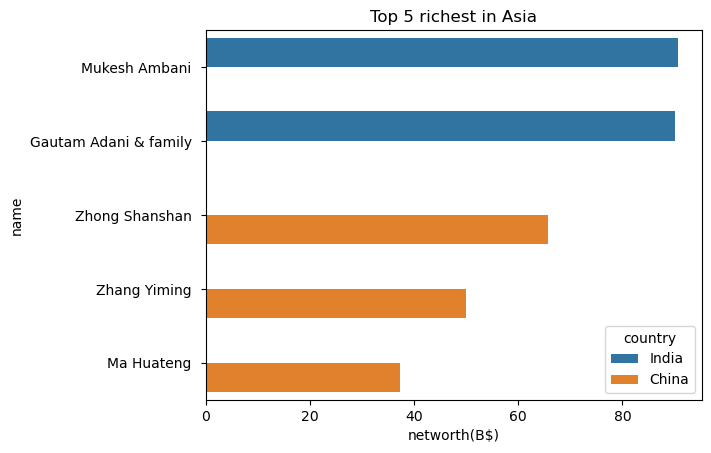

In [86]:
sns.barplot(y=asia_df['name'][:5], x=asia_df['networth(B$)'][:5], hue=asia_df.index[:5])
sns.color_palette('muted')
plt.title('Top 5 richest in Asia')
plt.show()

## 4. Which Industries have the most billionaires in it?

In [94]:
industry = df['industry'].value_counts().to_frame().rename(columns={'industry':'n_billionaires'})
industry.head()

,n_billionaires
Finance & Investments,386
Technology,329
Manufacturing,322
Fashion & Retail,246
Healthcare,212


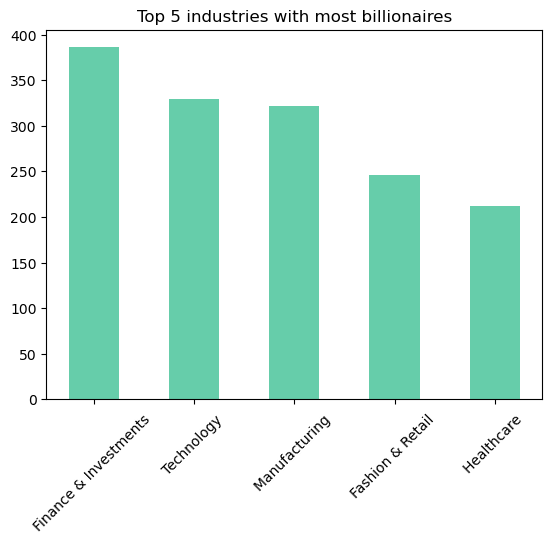

In [103]:
plt.bar(industry.index[:5], industry['n_billionaires'][:5], width=0.5, color='mediumaquamarine')
plt.title('Top 5 industries with most billionaires')
plt.xticks(rotation=45)
plt.show()

## 5. Is there a relationship between money and age?

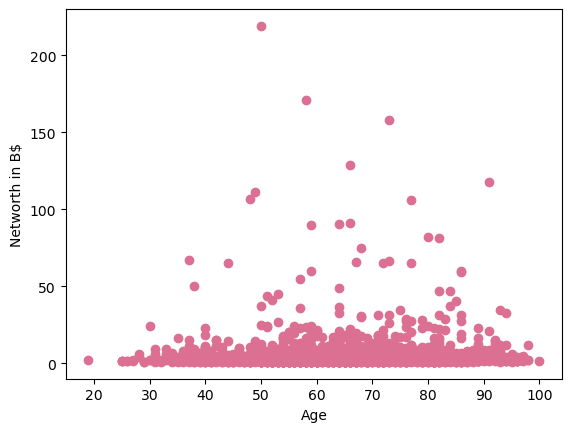

In [108]:
plt.scatter(df['age'], df['networth(B$)'], marker='o', color='palevioletred')
plt.xlabel('Age')
plt.ylabel('Networth in B$')
plt.show()

The graph suggests that there is no relationship between age and networth as money seems to be evenly distributed

## 6. The distribution of age

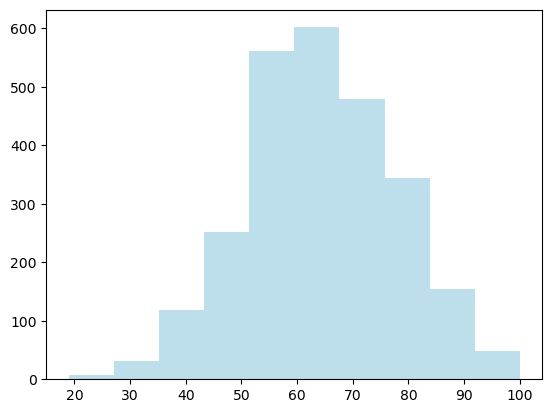

In [115]:
fig, ax = plt.subplots()
ax.hist(df['age'], color='lightblue', alpha=0.8)
    
plt.show()

Age distribution of billionaires seems to be normally distributed with most billionaires fall into the group 50-70 years

## 7. Who is the youngest billionaire or who are the youngest billionaires?

In [118]:
age = df.sort_values(by='age', ascending=True)
age.head()

,rank,name,networth(B$),age,country,source,industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments


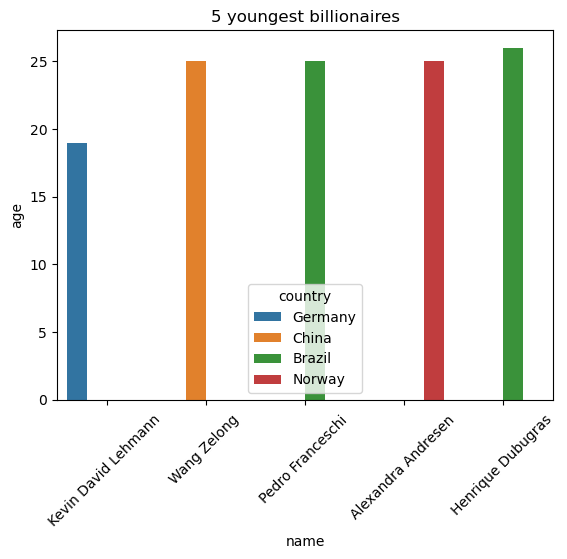

In [132]:
sns.barplot(x=age['name'][:5], y=age['age'][:5], hue=age['country'][:5])
plt.xticks(rotation=45)
plt.title('5 youngest billionaires')
plt.show()